$NDVI = \frac{NIR - Red}{NIR + Red}$
https://www.codecogs.com/latex/eqneditor.php

Latin Modern - 20 pt (Huge) - 150 - Black

1.0 -0.9800000000000018


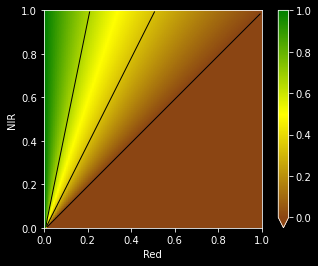

In [24]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.style.use('dark_background')

colors = ["saddlebrown", "yellow", "green"]
cmap = LinearSegmentedColormap.from_list("", colors)
cmap.set_under("saddlebrown")

red = np.tile(np.arange(0,1,0.01),(100,1))
nir = np.tile(np.arange(1,0,-0.01),(100,1)).T

ndvi = ((nir-red)/(nir+red)) 
print(ndvi.max(), ndvi.min())

fig, ax = plt.subplots()
im = ax.imshow(ndvi, cmap=cmap, vmin=0, vmax=1, extent=[0,1,0,1])
fig.colorbar(im, extend="min")
ax.contour(ndvi, levels=[0.,0.33,0.66], extent=[0,1,1,0], origin='lower', colors='black', linewidths=1)
plt.xlabel('Red')
plt.ylabel('NIR')

plt.show()

1.0 -0.9800000000000009


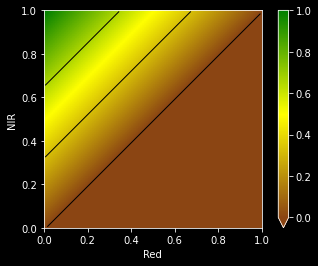

In [27]:
ndvi = (nir-red)
print(ndvi.max(), ndvi.min())

fig, ax = plt.subplots()
im = ax.imshow(ndvi, cmap=cmap, vmin=0, vmax=1, extent=[0,1,0,1])
ax.contour(ndvi, levels=[0.,0.33,0.66,1.0], extent=[0,1,1,0], origin='lower', colors='black', linewidths=1)
fig.colorbar(im, extend="min")
plt.xlabel('Red')
plt.ylabel('NIR')

plt.show()

inf -0.9898989898989908


<ipython-input-32-b7edd2dd2c49>:1: RuntimeWarning: divide by zero encountered in true_divide
  ndvi = (nir/red)-1


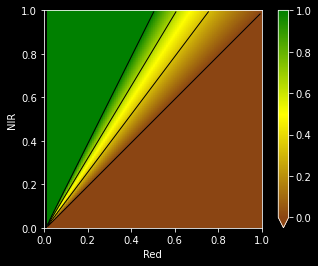

In [32]:
ndvi = (nir/red)-1
print(ndvi.max(), ndvi.min())

fig, ax = plt.subplots()
im = ax.imshow(ndvi, cmap=cmap, vmin=0, vmax=1, extent=[0,1,0,1])
ax.contour(ndvi, levels=[0.,0.33,0.66,1], extent=[0,1,1,0], origin='lower', colors='black', linewidths=1)
fig.colorbar(im, extend="min")
plt.xlabel('Red')
plt.ylabel('NIR')

plt.show()

inf 0.010101010101009214


<ipython-input-144-57620bdbe4b9>:1: RuntimeWarning: divide by zero encountered in true_divide
  ndvi = (nir/red)


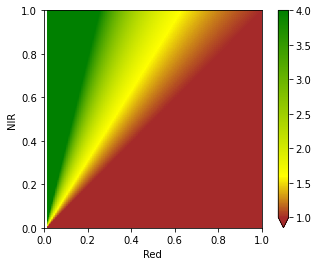

In [144]:
ndvi = (nir/red)
print(ndvi.max(), ndvi.min())

fig, ax = plt.subplots()
im = ax.imshow(ndvi, cmap=cmap, vmin=1, vmax=4, extent=[0,1,0,1])
fig.colorbar(im, extend="min")
plt.xlabel('Red')
plt.ylabel('NIR')

plt.show()

0.17157287157287157 -97.0200000000087


<ipython-input-106-7c9051bae318>:1: RuntimeWarning: divide by zero encountered in true_divide
  ndvi = ((nir-red)/(nir+red))/(nir/red)


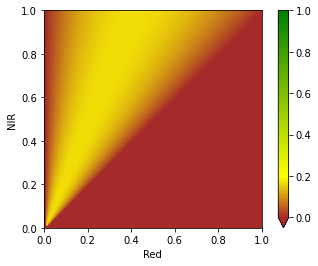

In [106]:
ndvi = ((nir-red)/(nir+red))/(nir/red)
print(ndvi.max(), ndvi.min())

fig, ax = plt.subplots()
im = ax.imshow(ndvi, cmap=cmap, vmin=0, vmax=1, extent=[0,1,0,1])
fig.colorbar(im, extend="min")
plt.xlabel('Red')
plt.ylabel('NIR')

plt.show()

inf -2.2975599250673393


<ipython-input-146-3afd14df5818>:1: RuntimeWarning: divide by zero encountered in log
  ndvi = 0.5*(np.log(nir)-np.log(red))


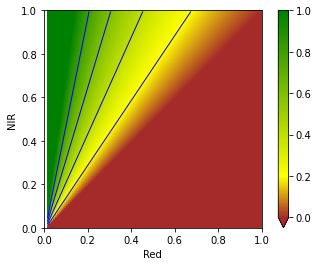

In [146]:
ndvi = 0.5*(np.log(nir)-np.log(red))
print(ndvi.max(), ndvi.min())

fig, ax = plt.subplots()
im = ax.imshow(ndvi, cmap=cmap, vmin=0, vmax=1, extent=[0,1,0,1])
ax.contour(ndvi, levels=[0.2,0.4,0.6,0.8], extent=[0,1,1,0], origin='lower', colors='b', linewidths=1)
fig.colorbar(im, extend="min")
plt.xlabel('Red')
plt.ylabel('NIR')

plt.show()

(100, 100)
nan nan


<ipython-input-83-c9dfef437e57>:4: RuntimeWarning: divide by zero encountered in true_divide
  ndvi = (np.outer(nir[::-1]**2,red[::-1]**2)/(2*nir))
<ipython-input-83-c9dfef437e57>:4: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (np.outer(nir[::-1]**2,red[::-1]**2)/(2*nir))


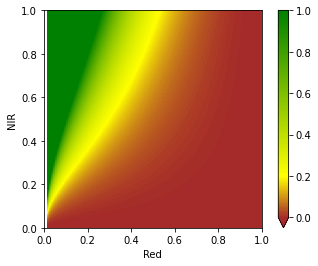

In [83]:
red = np.arange(0,1,0.01)
nir = np.arange(0,1,0.01)

ndvi = (np.outer(nir[::-1]**2,red[::-1]**2)/(2*nir))
print(ndvi.shape)
print(ndvi.max(), ndvi.min())

fig, ax = plt.subplots()
im = ax.imshow(ndvi, cmap=cmap, vmin=0, vmax=1, extent=[0,1,0,1])
fig.colorbar(im, extend="min")
plt.xlabel('Red')
plt.ylabel('NIR')

plt.show()

0 14.604283332824707
1000 0.0008754326845519245
2000 0.0006749482708983123
3000 0.0006121642654761672
4000 0.0005249381647445261
5000 0.00041771773248910904
6000 0.0003033323446288705
7000 0.0001997259969357401
8000 0.00012092936231056228
9000 7.010477565927431e-05
10000 4.560893648886122e-05
11000 2.9285982236615382e-05
12000 2.2648051526630297e-05
13000 3.5762848710874096e-05
14000 1.4318774447019678e-05
15000 5.446513387141749e-05
16000 5.1160550356144086e-05
17000 9.732075341162272e-06
18000 7.995012310857419e-06
19000 7.010784429439809e-06
20000 6.212478183442727e-06
21000 5.538165623875102e-06
22000 6.024589310982265e-06
23000 4.530452770268312e-06
24000 4.012653789686738e-06


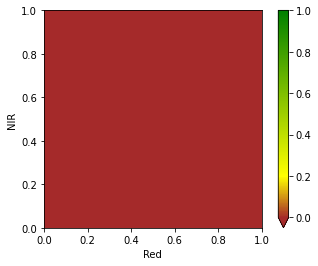

In [289]:
import torch
from torch import nn
import torch.optim as optim

device = torch.device('cpu')

red = np.tile(np.arange(0,1,0.01),(100,1))
nir = np.tile(np.arange(1,0,-0.01),(100,1)).T


ndvi = np.clip(((nir-red)/(nir+red)),0,1)

bottom_left=0
idx1 = np.random.randint(50, size=(1000,1))+50
idx2 = np.random.randint(50, size=(1000,1))

top_right=0
idx1 = np.random.randint(50, size=(1000,1))
idx2 = np.random.randint(50, size=(1000,1))+50

bottom_left=0
idx1 = np.random.randint(50, size=(1000,1))
idx2 = np.random.randint(50, size=(1000,1))

bottom_right=0
idx1 = np.random.randint(50, size=(1000,1))+50
idx2 = np.random.randint(50, size=(1000,1))+50

y = torch.from_numpy(ndvi[idx1[:,0],idx2[:,0]].astype(np.float32)).unsqueeze(1).to(device)

x1 = red[idx1[:,0],idx2[:,0]]
x2 = nir[idx1[:,0],idx2[:,0]]
x = torch.from_numpy(np.vstack((x1,x2)).T.astype(np.float32)).to(device)

model = torch.nn.Sequential(
          torch.nn.Linear(2, 5),
          torch.nn.Tanh(),
          torch.nn.Linear(5, 1),
        ).to(device)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(25000):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    if t % 1000 == 0:
        print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
red = np.tile(np.arange(0,1,0.01),(100,1)).astype(np.float32)
nir = np.tile(np.arange(1,0,-0.01),(100,1)).T.astype(np.float32)

test = torch.from_numpy(np.concatenate((red.flatten()[:,None],nir.flatten()[:,None]), axis=1))

model.eval()
yhat = model(test)
yhat = yhat.detach().numpy()

fig, ax = plt.subplots()
im = ax.imshow(yhat.reshape(100,100), cmap=cmap, vmin=0, vmax=1, extent=[0,1,0,1])
fig.colorbar(im, extend="min")
plt.xlabel('Red')
plt.ylabel('NIR')

plt.show()

In [256]:
list(model.parameters())[0].detach().numpy(),\
list(model.parameters())[1].detach().numpy(),\
list(model.parameters())[2].detach().numpy(),\
list(model.parameters())[3].detach().numpy()

(array([[-0.38075903, -1.2482055 ],
        [-1.2375723 , -0.3666852 ]], dtype=float32),
 array([-0.7290724, -0.7692437], dtype=float32),
 array([[-6.674542 ,  7.0692573]], dtype=float32),
 array([0.39275578], dtype=float32))

In [259]:
a = np.concatenate((red.flatten()[:,None],nir.flatten()[:,None]), axis=1)
b = list(model.parameters())[0].detach().numpy()

np.dot(a, b).shape

(10000, 2)

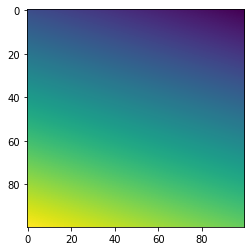

In [260]:
plt.imshow(np.dot(a, b)[:,0].reshape(100,100))

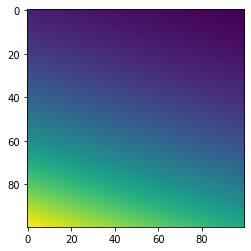

In [263]:
plt.imshow(np.tanh(np.dot(a, b)[:,0].reshape(100,100)))

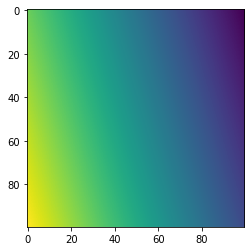

In [261]:
plt.imshow(np.dot(a, b)[:,1].reshape(100,100))

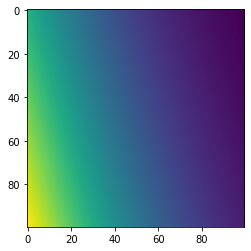

In [262]:
plt.imshow(np.tanh(np.dot(a, b)[:,1].reshape(100,100)))